In [1]:
import os
main_dir = os.path.dirname(os.path.dirname(os.getcwd()))
os.chdir(main_dir)

import pyvdirs.dirs as dirs
import sys
sys.path.insert(0, dirs.SYSTEM_HOME)
sys.path.insert(0, os.path.join(dirs.SYSTEM_HOME, "ToyExample"))


In [7]:
import os
import csv
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wandb
import tqdm
from sklearn import datasets, decomposition

import karras.dnnlib as dnnlib
from ours.dataset import DATASET_OPTIONS, get_dataset_kwargs
import Images.download_metrics as met

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parameters

In [3]:
dataset_name = "tiny"

## Dataset

In [4]:
dataset_kwargs = get_dataset_kwargs(dataset_name)
dataset = dnnlib.util.construct_class_by_name(**dataset_kwargs)

## Principal Components Analysis (PCA)

In [14]:
images = [dataset[i][1].flatten() for i in range(len(dataset))]

In [24]:
images[0].min()

tensor(2.)

In [8]:
img_pca = decomposition.PCA(n_components=2)
img_pca.fit(images)

PCA(n_components=2)

In [18]:
img_pca_data = img_pca.transform(images)
print("Image data PCA shape", img_pca_data.shape)

Image data PCA shape (100000, 2)


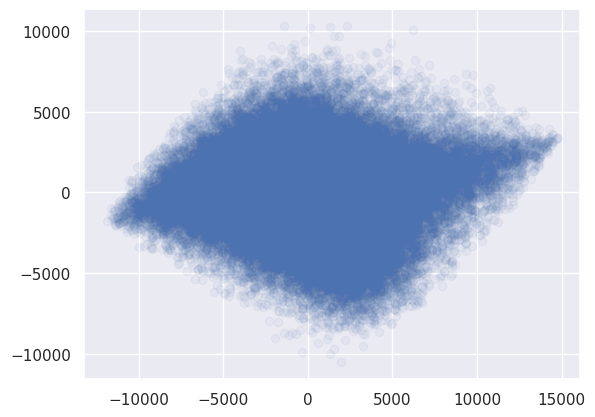

In [21]:
plt.scatter(*img_pca_data.T, alpha=.05)